In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.font_manager import FontProperties
import math
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator,LogLocator,NullFormatter)

# 1.Loading dataset

In [2]:
# Loading data
df = pd.read_csv(r"E:\Simplelearn_AI and ML\Deep learning\DL project\Datasets_October\House_Loan_Data_Analysis_dataset\loan_data.csv")
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


# 2 Check for null values in the dataset

In [3]:
df.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

# 3 Print the percentage of default to a payer of the dataset for the TARGET column

In [4]:
defaulters=(df.TARGET==1).sum()
payers=(df.TARGET==0).sum()
print((defaulters/payers)*100)

8.781828601345662


# 4. Balance the dataset if the data is imbalanced

In [5]:
X = df.drop("TARGET", axis = 1)
y = df.TARGET

In [6]:
y.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

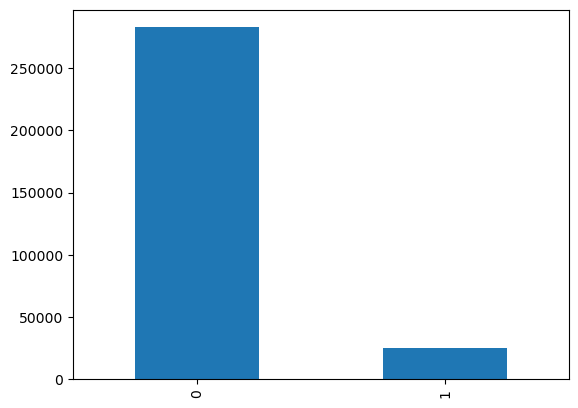

In [7]:
y.value_counts().plot(kind = "bar")
plt.show()

In [8]:
X.shape, y.shape

((307511, 121), (307511,))

In [9]:
df.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [10]:
obj = []
num = []
for x in df.columns:
    if np.dtype(df[x]) == "object":
        obj.append(x)
    else:
        num.append(x)

In [11]:
print(obj)

['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']


In [12]:
from category_encoders.binary import BinaryEncoder

In [13]:
encoder = BinaryEncoder(cols=obj)

In [14]:
X = encoder.fit_transform(X)

In [15]:
X.shape

(307511, 156)

In [17]:
X.sample(10)

,SK_ID_CURR,NAME_CONTRACT_TYPE_0,NAME_CONTRACT_TYPE_1,CODE_GENDER_0,CODE_GENDER_1,FLAG_OWN_CAR_0,FLAG_OWN_CAR_1,FLAG_OWN_REALTY_0,FLAG_OWN_REALTY_1,CNT_CHILDREN,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
215085,349225,0,1,1,0,0,1,1,0,1,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
166881,293462,0,1,1,0,1,0,1,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,4.0
197824,329359,0,1,1,0,0,1,0,1,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,6.0
76416,188611,0,1,1,0,0,1,0,1,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
44123,151111,0,1,1,0,0,1,1,0,0,...,0,0,0,0,0.0,0.0,0.0,11.0,3.0,3.0
166289,292787,0,1,1,0,0,1,1,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
209380,342671,0,1,1,0,0,1,0,1,0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
215350,349529,0,1,0,1,1,0,0,1,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
187118,316920,0,1,0,1,0,1,0,1,1,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
197430,328903,0,1,1,0,0,1,0,1,1,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
X.fillna(0, inplace=True)

In [26]:
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE 

ImportError: cannot import name 'parse_version' from 'sklearn.utils' (C:\Users\raghuram\anaconda3\lib\site-packages\sklearn\utils\__init__.py)

In [25]:
 from sklearn.utils import parse_version

ImportError: cannot import name 'parse_version' from 'sklearn.utils' (C:\Users\raghuram\anaconda3\lib\site-packages\sklearn\utils\__init__.py)